In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/scratch2/mrenaudin/Hard-CBR-RNN/SPR_dataset/SPR_allconditions_preprocessed.csv')

In [8]:
df.describe(include='all')

,Time,MD5,Type,WordPosition,EachWord,EventTime,Sentence,Question,Answer,List,...,CriticalPosition,consec,CONSTRUCTION,correct,ROI,RT,AMBIG,AMBUAMB,RTacross3words,trialnumber
count,3.140162e+06,3140162,3140162,3.140162e+06,3140162,3.140162e+06,3140097,3139385,3140162,3140162,...,1.602782e+06,3140162,3140162,3.059829e+06,1.584619e+06,3.140162e+06,1602782,1.602782e+06,1.602782e+06,3.140162e+06
unique,NaN,2190,15,NaN,1227,NaN,340,186,3,18,...,NaN,1,8,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,61bc66eaf1e484bfaffe714d2a04f407,FILLER1,NaN,the,NaN,Hybrid vehicles have a halo that makes owners ...,What was sold at the stand that was shut-down?,0,r,...,NaN,no,FILLER1,NaN,NaN,NaN,Unamb,NaN,NaN,NaN
freq,NaN,1458,1162890,NaN,330715,NaN,52560,52560,1571223,181561,...,NaN,3140162,1162890,NaN,NaN,NaN,894337,NaN,NaN,NaN
mean,1.635487e+09,NaN,NaN,8.875528e+00,NaN,1.636402e+12,NaN,NaN,NaN,NaN,...,8.626672e+00,NaN,NaN,8.381501e-01,-6.800379e-01,4.119493e+02,NaN,4.420096e-01,4.438079e+02,4.628524e+01
std,3.199668e+06,NaN,NaN,5.345434e+00,NaN,3.714069e+09,NaN,NaN,NaN,NaN,...,2.950670e+00,NaN,NaN,3.683131e-01,4.736931e+00,2.718802e+03,NaN,4.966259e-01,6.580859e+02,2.640361e+01
min,1.627328e+09,NaN,NaN,1.000000e+00,NaN,1.630000e+12,NaN,NaN,NaN,NaN,...,4.000000e+00,NaN,NaN,0.000000e+00,-1.400000e+01,-4.466800e+04,NaN,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.634850e+09,NaN,NaN,4.000000e+00,NaN,1.634770e+12,NaN,NaN,NaN,NaN,...,7.000000e+00,NaN,NaN,1.000000e+00,-4.000000e+00,2.690000e+02,NaN,0.000000e+00,2.946667e+02,2.300000e+01
50%,1.635869e+09,NaN,NaN,8.000000e+00,NaN,1.638910e+12,NaN,NaN,NaN,NaN,...,8.000000e+00,NaN,NaN,1.000000e+00,0.000000e+00,3.480000e+02,NaN,0.000000e+00,3.846667e+02,4.600000e+01
75%,1.638908e+09,NaN,NaN,1.300000e+01,NaN,1.639680e+12,NaN,NaN,NaN,NaN,...,1.200000e+01,NaN,NaN,1.000000e+00,3.000000e+00,4.470000e+02,NaN,1.000000e+00,5.073333e+02,6.900000e+01


In [9]:
def describe_dataframe_for_llm(df):
    """Generate a comprehensive description of a DataFrame for LLM prompts"""
    
    description = f"""
DataFrame Summary:
- Shape: {df.shape[0]} rows, {df.shape[1]} columns
- Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

Column Information:
"""
    
    for col in df.columns:
        col_info = f"\n- {col} ({df[col].dtype}):"
        col_info += f" {df[col].count()}/{len(df)} non-null"
        
        if df[col].dtype in ['int64', 'float64']:
            col_info += f", range: {df[col].min():.2f} to {df[col].max():.2f}"
            col_info += f", mean: {df[col].mean():.2f}"
        elif df[col].dtype == 'object':
            unique_count = df[col].nunique()
            col_info += f", {unique_count} unique values"
            if unique_count <= 10:
                col_info += f", values: {list(df[col].unique())}"
        
        description += col_info
    
    # Add sample data
    description += f"\n\nSample data (first 3 rows):\n{df.head(3).to_string()}"
    
    return description

# Usage
llm_description = describe_dataframe_for_llm(df)
print(llm_description)


DataFrame Summary:
- Shape: 3140162 rows, 24 columns
- Memory usage: 2923.54 MB

Column Information:

- Time (int64): 3140162/3140162 non-null, range: 1627328367.00 to 1639682759.00, mean: 1635486695.64
- MD5 (object): 3140162/3140162 non-null, 2190 unique values
- Type (object): 3140162/3140162 non-null, 15 unique values
- WordPosition (int64): 3140162/3140162 non-null, range: 1.00 to 24.00, mean: 8.88
- EachWord (object): 3140162/3140162 non-null, 1227 unique values
- EventTime (float64): 3140162/3140162 non-null, range: 1630000000000.00 to 1640000000000.00, mean: 1636402030939.80
- Sentence (object): 3140097/3140162 non-null, 340 unique values
- Question (object): 3139385/3140162 non-null, 186 unique values
- Answer (object): 3140162/3140162 non-null, 3 unique values, values: ['0', '1', 'NA ']
- List (object): 3140162/3140162 non-null, 18 unique values
- item (int64): 3140162/3140162 non-null, range: 1.00 to 112.00, mean: 60.21
- RT_Answering (float64): 3139385/3140162 non-null, ra

In [5]:
"""
Agreement Violation Analysis using Log-Transformed Reading Times
Following SAP Benchmark methodology (Huang et al. 2024, Appendix A)
Focused on agreement subset only
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import mixedlm
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def prepare_agreement_data(df):
    """
    Prepare agreement violation data following SAP Benchmark preprocessing
    """
    print("=== AGREEMENT DATA PREPROCESSING ===")
    print("Following SAP Benchmark methodology...")
    
    # Create a copy
    data = df.copy()
    
    # 1. Filter to agreement conditions only
    print(f"Original data shape: {data.shape}")
    agreement_data = data[data['Type'].isin(['AGREE', 'AGREE_UNG'])].copy()
    print(f"Agreement conditions only: {agreement_data.shape}")
    
    # 2. Filter extreme RTs (SAP Benchmark: exclude RTs > 7000ms)
    print(f"RT range before filtering: {agreement_data['RT'].min()}-{agreement_data['RT'].max()}ms")
    agreement_data = agreement_data[
        (agreement_data['RT'] >= 100) & 
        (agreement_data['RT'] <= 7000)
    ].copy()
    print(f"After RT filtering (100-7000ms): {agreement_data.shape}")
    print(f"RT range after filtering: {agreement_data['RT'].min()}-{agreement_data['RT'].max()}ms")
    
    # 3. Create log-transformed RT
    agreement_data['log_RT'] = np.log(agreement_data['RT'])
    print(f"Log RT range: {agreement_data['log_RT'].min():.3f}-{agreement_data['log_RT'].max():.3f}")
    
    # 4. Create contrast coding (SAP Benchmark Table 3 style)
    # Grammatical (AGREE) = 0, Ungrammatical (AGREE_UNG) = 1
    agreement_data['grammaticality'] = (agreement_data['Type'] == 'AGREE_UNG').astype(int)
    
    print(f"Condition coding:")
    print(f"  AGREE (grammatical): {len(agreement_data[agreement_data['grammaticality']==0]):,} observations")
    print(f"  AGREE_UNG (ungrammatical): {len(agreement_data[agreement_data['grammaticality']==1]):,} observations")
    
    # 5. Define regions of interest (ROI column)
    agreement_data['region'] = 'other'
    agreement_data.loc[agreement_data['ROI'] == 0, 'region'] = 'critical'
    agreement_data.loc[agreement_data['ROI'] == 1, 'region'] = 'spillover1'
    agreement_data.loc[agreement_data['ROI'] == 2, 'region'] = 'spillover2'
    
    # 6. Create participant and item IDs as categorical
    agreement_data['participant_id'] = pd.Categorical(agreement_data['MD5'])
    agreement_data['item_id'] = pd.Categorical(agreement_data['item'])
    
    # 7. Filter to critical regions only
    critical_data = agreement_data[
        agreement_data['region'].isin(['critical', 'spillover1', 'spillover2'])
    ].copy()
    
    print(f"\nCritical regions data:")
    print(f"  Total observations: {len(critical_data):,}")
    print(f"  Participants: {critical_data['participant_id'].nunique()}")
    print(f"  Items: {critical_data['item_id'].nunique()}")
    print(f"  Region distribution:")
    for region in ['critical', 'spillover1', 'spillover2']:
        n_obs = len(critical_data[critical_data['region'] == region])
        print(f"    {region}: {n_obs:,} observations")
    
    return critical_data

def fit_agreement_model_by_region(data, region='spillover1'):
    """
    Fit mixed-effects model for agreement violations in specific region
    Following SAP Benchmark model structure with fallback strategy
    """
    print(f"\n=== FITTING AGREEMENT MODEL: {region.upper()} ===")
    
    # Filter to specific region
    region_data = data[data['region'] == region].copy()
    
    if len(region_data) == 0:
        print(f"❌ No data for region {region}")
        return None, None
    
    print(f"Region data: {len(region_data):,} observations")
    print(f"Participants: {region_data['participant_id'].nunique()}")
    print(f"Items: {region_data['item_id'].nunique()}")
    
    # Calculate baseline statistics
    baseline_rt = np.exp(region_data['log_RT'].mean())
    print(f"Mean RT: {region_data['RT'].mean():.1f}ms")
    print(f"Mean log(RT): {region_data['log_RT'].mean():.3f}")
    print(f"Baseline RT (exp of mean log): {baseline_rt:.1f}ms")
    
    # SAP Benchmark approach: Try maximal model first, then fall back
    model_info = {}
    
    try:
        # Attempt 1: Maximal random effects (following SAP Benchmark)
        print("\n🔄 Attempting maximal random effects model...")
        print("   Model: log_RT ~ grammaticality + (1 + grammaticality | participant) + (1 + grammaticality | item)")
        
        model = mixedlm(
            "log_RT ~ grammaticality",
            groups=region_data["participant_id"],
            re_formula="grammaticality",  # Random slope for grammaticality by participant
            vc_formula={"item_id": "0 + grammaticality"},  # Random slope for grammaticality by item
            data=region_data
        )
        result = model.fit(method='powell', maxiter=2000)
        model_info['type'] = 'maximal'
        print("✅ Maximal model converged successfully!")
        
    except Exception as e:
        print(f"❌ Maximal model failed: {str(e)[:100]}")
        
        try:
            # Attempt 2: Random intercepts only (SAP fallback)
            print("\n🔄 Attempting random intercepts model...")
            print("   Model: log_RT ~ grammaticality + (1 | participant) + (1 | item)")
            
            model = mixedlm(
                "log_RT ~ grammaticality",
                groups=region_data["participant_id"],
                vc_formula={"item_id": "1"},  # Random intercept by item
                data=region_data
            )
            result = model.fit(method='powell', maxiter=2000)
            model_info['type'] = 'random_intercepts'
            print("✅ Random intercepts model converged!")
            
        except Exception as e:
            print(f"❌ Random intercepts model failed: {str(e)[:100]}")
            
            try:
                # Attempt 3: Participant random effects only (final fallback)
                print("\n🔄 Attempting participant-only random effects...")
                print("   Model: log_RT ~ grammaticality + (1 | participant)")
                
                model = mixedlm(
                    "log_RT ~ grammaticality",
                    groups=region_data["participant_id"],
                    data=region_data
                )
                result = model.fit(method='powell', maxiter=2000)
                model_info['type'] = 'participant_only'
                print("✅ Participant-only model converged!")
                
            except Exception as e:
                print(f"❌ All models failed: {str(e)[:100]}")
                return None, None
    
    # Store model information
    model_info.update({
        'n_obs': len(region_data),
        'n_participants': region_data['participant_id'].nunique(),
        'n_items': region_data['item_id'].nunique(),
        'baseline_rt': baseline_rt
    })
    
    return result, model_info

def extract_agreement_effect(model_result, model_info):
    """
    Extract agreement violation effect from log-RT model
    Convert to milliseconds following SAP Benchmark methodology
    """
    print(f"\n=== EXTRACTING AGREEMENT VIOLATION EFFECT ===")
    
    # Get coefficient from log-RT model
    log_effect = model_result.params['grammaticality']
    log_se = model_result.bse['grammaticality']
    
    print(f"Log-scale coefficient: {log_effect:.4f} (SE: {log_se:.4f})")
    
    # Convert to multiplicative effect on original scale
    multiplicative_effect = np.exp(log_effect)
    print(f"Multiplicative effect: {multiplicative_effect:.4f}")
    print(f"Interpretation: Ungrammatical RTs are {multiplicative_effect:.3f}x grammatical RTs")
    
    # Convert to millisecond difference using baseline RT
    baseline_rt = model_info['baseline_rt']
    ms_effect = baseline_rt * (multiplicative_effect - 1)
    
    print(f"Baseline RT: {baseline_rt:.1f}ms")
    print(f"Agreement violation effect: {ms_effect:.1f}ms")
    
    # Confidence intervals on log scale
    alpha = 0.05  # 95% confidence interval
    t_critical = stats.t.ppf(1 - alpha/2, model_result.df_resid)
    log_ci_lower = log_effect - t_critical * log_se
    log_ci_upper = log_effect + t_critical * log_se
    
    # Transform CIs to millisecond scale
    ms_ci_lower = baseline_rt * (np.exp(log_ci_lower) - 1)
    ms_ci_upper = baseline_rt * (np.exp(log_ci_upper) - 1)
    
    # Statistical significance
    t_stat = log_effect / log_se
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), model_result.df_resid))
    significant = p_value < 0.05
    
    significance_stars = ('***' if p_value < 0.001 else 
                         '**' if p_value < 0.01 else 
                         '*' if p_value < 0.05 else 'ns')
    
    print(f"95% CI (ms): [{ms_ci_lower:.1f}, {ms_ci_upper:.1f}]")
    print(f"t-statistic: {t_stat:.3f}")
    print(f"p-value: {p_value:.4f} {significance_stars}")
    
    return {
        'log_effect': log_effect,
        'log_se': log_se,
        'log_ci_lower': log_ci_lower,
        'log_ci_upper': log_ci_upper,
        'multiplicative_effect': multiplicative_effect,
        'ms_effect': ms_effect,
        'ms_ci_lower': ms_ci_lower,
        'ms_ci_upper': ms_ci_upper,
        'baseline_rt': baseline_rt,
        't_stat': t_stat,
        'p_value': p_value,
        'significant': significant,
        'significance_stars': significance_stars
    }

def analyze_all_regions(data):
    """
    Analyze agreement violations across all regions
    """
    print("\n" + "="*70)
    print("AGREEMENT VIOLATION ANALYSIS - ALL REGIONS")
    print("="*70)
    
    regions = ['critical', 'spillover1', 'spillover2']
    results = {}
    
    for region in regions:
        print(f"\n{'='*20} {region.upper()} REGION {'='*20}")
        
        # Fit model
        model_result, model_info = fit_agreement_model_by_region(data, region)
        
        if model_result is not None:
            # Extract effect
            effect = extract_agreement_effect(model_result, model_info)
            
            # Store results
            results[region] = {
                'model': model_result,
                'model_info': model_info,
                'effect': effect
            }
            
            # Print summary
            print(f"\n📊 SUMMARY - {region.upper()}")
            print(f"Model type: {model_info['type']}")
            print(f"Effect: {effect['ms_effect']:>6.1f}ms [{effect['ms_ci_lower']:>5.1f}, {effect['ms_ci_upper']:>5.1f}] {effect['significance_stars']}")
            
        else:
            print(f"❌ Failed to fit model for {region}")
            results[region] = None
    
    return results

def plot_agreement_effects(results):
    """
    Plot agreement violation effects across regions
    """
    print("\n📈 Creating visualization...")
    
    # Prepare plot data
    plot_data = []
    for region, result in results.items():
        if result is not None:
            effect = result['effect']
            plot_data.append({
                'region': region,
                'effect': effect['ms_effect'],
                'ci_lower': effect['ms_ci_lower'],
                'ci_upper': effect['ms_ci_upper'],
                'significant': effect['significant'],
                'p_value': effect['p_value']
            })
    
    if not plot_data:
        print("❌ No data to plot")
        return None
        
    plot_df = pd.DataFrame(plot_data)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot bars
    regions = ['critical', 'spillover1', 'spillover2']
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Red, teal, blue
    
    bars = ax.bar(range(len(plot_df)), plot_df['effect'], 
                  color=colors[:len(plot_df)], alpha=0.7, width=0.6)
    
    # Add error bars
    ax.errorbar(range(len(plot_df)), plot_df['effect'],
               yerr=[plot_df['effect'] - plot_df['ci_lower'],
                     plot_df['ci_upper'] - plot_df['effect']],
               fmt='none', color='black', capsize=5, linewidth=1.5)
    
    # Mark significant effects
    for i, (effect, significant, p_val) in enumerate(zip(plot_df['effect'], 
                                                        plot_df['significant'], 
                                                        plot_df['p_value'])):
        if significant:
            stars = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*'
            height = effect + (plot_df['ci_upper'].iloc[i] - effect) + 2
            ax.text(i, height, stars, ha='center', va='bottom', 
                   fontsize=14, fontweight='bold')
    
    # Formatting
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.set_xlabel('Word Position', fontsize=12)
    ax.set_ylabel('Agreement Violation Effect (ms)', fontsize=12)
    ax.set_title('Agreement Violation Effects from Log-RT Models\n(Following SAP Benchmark Methodology)', 
                fontsize=14, pad=20)
    ax.set_xticks(range(len(plot_df)))
    ax.set_xticklabels(plot_df['region'])
    ax.grid(True, alpha=0.3)
    
    # Add sample sizes as text
    for i, region in enumerate(plot_df['region']):
        if region in results and results[region] is not None:
            n_obs = results[region]['model_info']['n_obs']
            ax.text(i, ax.get_ylim()[0] + 0.02 * (ax.get_ylim()[1] - ax.get_ylim()[0]), 
                   f'n={n_obs:,}', ha='center', va='bottom', fontsize=9, alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    return fig

def create_summary_table(results):
    """
    Create a summary table of results
    """
    print("\n" + "="*80)
    print("📋 AGREEMENT VIOLATION EFFECTS - SUMMARY TABLE")
    print("="*80)
    
    # Create table
    table_data = []
    for region, result in results.items():
        if result is not None:
            effect = result['effect']
            model_info = result['model_info']
            
            table_data.append({
                'Region': region.title(),
                'N_obs': f"{model_info['n_obs']:,}",
                'N_participants': model_info['n_participants'],
                'N_items': model_info['n_items'],
                'Model_type': model_info['type'],
                'Effect_ms': f"{effect['ms_effect']:.1f}",
                'CI_lower': f"{effect['ms_ci_lower']:.1f}",
                'CI_upper': f"{effect['ms_ci_upper']:.1f}",
                'p_value': f"{effect['p_value']:.4f}",
                'Significance': effect['significance_stars']
            })
    
    if table_data:
        summary_df = pd.DataFrame(table_data)
        
        # Print formatted table
        print(f"{'Region':<12} {'N_obs':<8} {'N_part':<6} {'N_item':<6} {'Model':<15} {'Effect':<8} {'95% CI':<15} {'p-value':<8} {'Sig':<4}")
        print("-" * 80)
        
        for _, row in summary_df.iterrows():
            ci_str = f"[{row['CI_lower']}, {row['CI_upper']}]"
            print(f"{row['Region']:<12} {row['N_obs']:<8} {row['N_participants']:<6} {row['N_items']:<6} "
                  f"{row['Model_type']:<15} {row['Effect_ms']:<8} {ci_str:<15} "
                  f"{row['p_value']:<8} {row['Significance']:<4}")
    
    return table_data

def run_agreement_analysis(df):
    """
    Main function to run complete agreement violation analysis
    """
    print("🚀 AGREEMENT VIOLATION ANALYSIS")
    print("Following SAP Benchmark log-RT methodology")
    print("="*70)
    
    # 1. Prepare data
    data = prepare_agreement_data(df)
    
    # 2. Analyze all regions
    results = analyze_all_regions(data)
    
    # 3. Create visualization
    plot = plot_agreement_effects(results)
    
    # 4. Create summary table
    summary = create_summary_table(results)
    
    # 5. Final summary
    print(f"\n✅ ANALYSIS COMPLETE!")
    print(f"📊 Results:")
    
    significant_regions = []
    for region, result in results.items():
        if result is not None and result['effect']['significant']:
            significant_regions.append(region)
            effect_size = result['effect']['ms_effect']
            print(f"   • {region}: +{effect_size:.1f}ms agreement violation effect")
    
    if not significant_regions:
        print("   • No significant agreement violation effects found")
    
    print(f"\n📝 Note: Effects are from log(RT) models, back-transformed to milliseconds")
    print(f"📚 Methodology follows SAP Benchmark (Huang et al. 2024, Appendix A)")
    
    return results, data

# Example usage:
# results, processed_data = run_agreement_analysis(your_dataframe)

🚀 AGREEMENT VIOLATION ANALYSIS
Following SAP Benchmark log-RT methodology
=== AGREEMENT DATA PREPROCESSING ===
Following SAP Benchmark methodology...
Original data shape: (420862, 24)
Agreement conditions only: (204947, 24)
RT range before filtering: 21-540940ms
After RT filtering (100-7000ms): (204624, 24)
RT range after filtering: 100-6842ms
Log RT range: 4.605-8.831
Condition coding:
  AGREE (grammatical): 102,761 observations
  AGREE_UNG (ungrammatical): 101,863 observations

Critical regions data:
  Total observations: 44,744
  Participants: 2000
  Items: 18
  Region distribution:
    critical: 14,918 observations
    spillover1: 14,913 observations
    spillover2: 14,913 observations

AGREEMENT VIOLATION ANALYSIS - ALL REGIONS

==================== CRITICAL REGION ====================

=== FITTING AGREEMENT MODEL: CRITICAL ===
Region data: 14,918 observations
Participants: 2000
Items: 18
Mean RT: 380.3ms
Mean log(RT): 5.823
Baseline RT (exp of mean log): 337.8ms

🔄 Attempting max

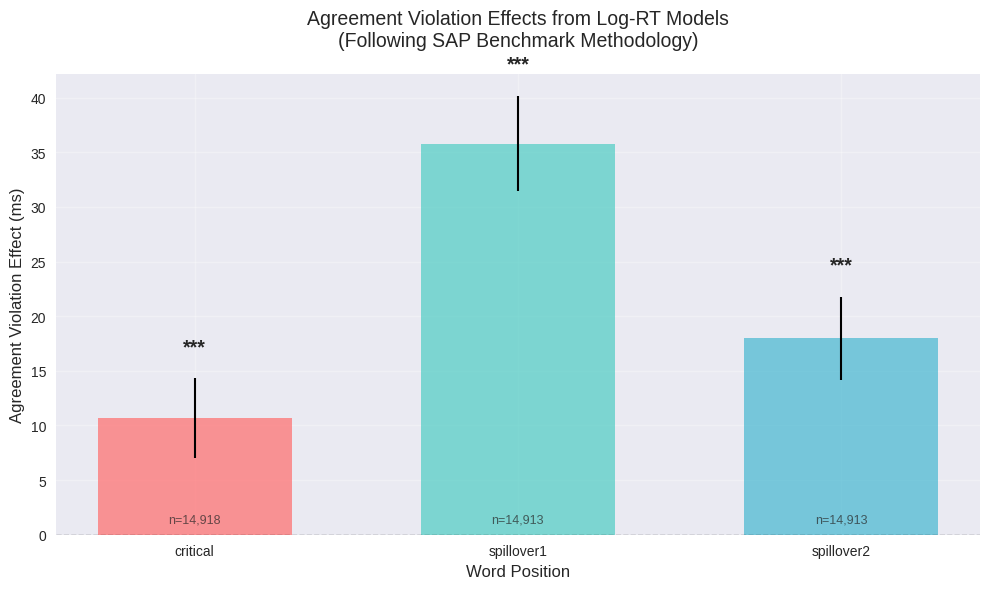


📋 AGREEMENT VIOLATION EFFECTS - SUMMARY TABLE
Region       N_obs    N_part N_item Model           Effect   95% CI          p-value  Sig 
--------------------------------------------------------------------------------
Critical     14,918   2000   18     random_intercepts 10.7     [7.1, 14.3]     0.0000   *** 
Spillover1   14,913   2000   18     random_intercepts 35.8     [31.5, 40.2]    0.0000   *** 
Spillover2   14,913   2000   18     maximal         18.0     [14.2, 21.8]    0.0000   *** 

✅ ANALYSIS COMPLETE!
📊 Results:
   • critical: +10.7ms agreement violation effect
   • spillover1: +35.8ms agreement violation effect
   • spillover2: +18.0ms agreement violation effect

📝 Note: Effects are from log(RT) models, back-transformed to milliseconds
📚 Methodology follows SAP Benchmark (Huang et al. 2024, Appendix A)


In [6]:
results, processed_data = run_agreement_analysis(df)

In [3]:
from extract_eoi_from_rt import run_complete_sap_analysis, prepare_full_dataset, prepare_construction_subsets, create_comprehensive_plot
import pandas as pd

🚀 COMPLETE SAP BENCHMARK LOG-RT ANALYSIS
Following SAP Benchmark Appendix A methodology
=== FULL DATASET PREPROCESSING ===
Following SAP Benchmark methodology...
Original data shape: (3140162, 24)
Constructions: ['Attachment', 'FILLER1', 'FILLER2', 'MVRR', 'NP/Z Agreement', 'NPS', 'NPZ', 'RelativeClause']
Types: ['AGREE', 'AGREE_UNG', 'AttachHigh', 'AttachLow', 'AttachMulti', 'FILLER1', 'FILLER2', 'MVRR_AMB', 'MVRR_UAMB', 'NPS_AMB', 'NPS_UAMB', 'NPZ_AMB', 'NPZ_UAMB', 'RC_Obj', 'RC_Subj']

RT filtering...
RT range before: -44668-2237665ms
⚠️  Found 4 negative RTs - removing
After RT filtering: (3097812, 24)
RT range after: 100-7000ms

Critical regions data:
  Total observations: 331,532
  Participants: 2187
  Items: 72
  Constructions: ['Attachment', 'MVRR', 'NP/Z Agreement', 'NPS', 'NPZ', 'RelativeClause']

=== PREPARING CONSTRUCTION SUBSETS ===
MVRR Garden Path: 51,549 observations
NPZ Garden Path: 51,657 observations
NPS Garden Path: 51,602 observations
Agreement: 48,031 observations

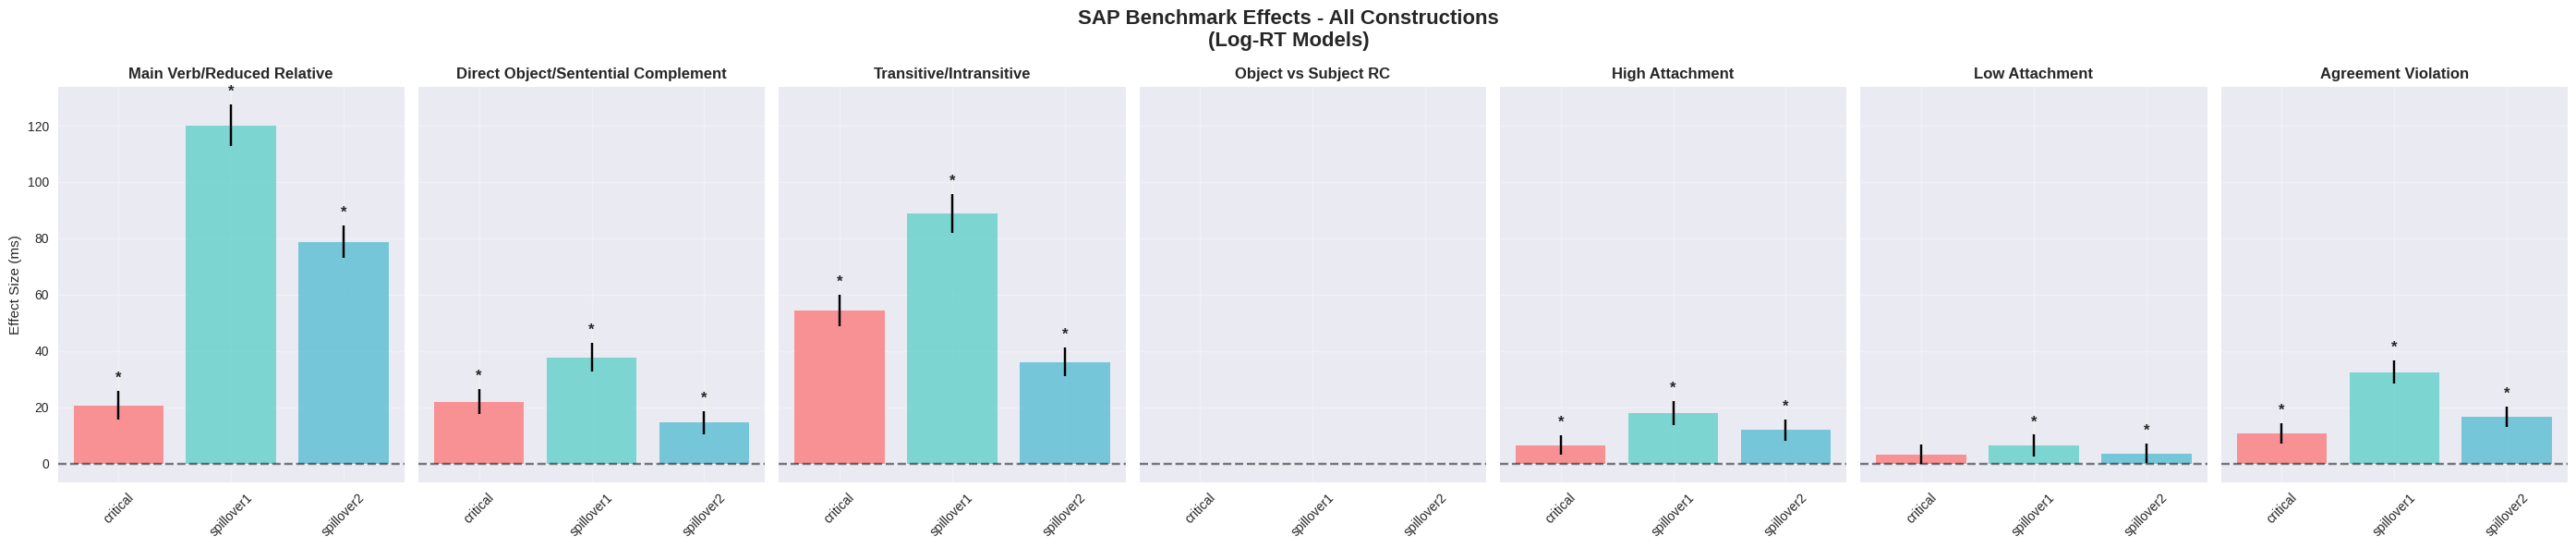


📋 COMPREHENSIVE SUMMARY - ALL CONSTRUCTIONS
Construction         Region       N_obs      Effect   95% CI             p-value    Sig 
----------------------------------------------------------------------------------------------------
Main Verb/Reduced Relative Critical     17,181     20.6     [15.5, 25.8]       0.0000     *** 
Main Verb/Reduced Relative Spillover1   17,182     120.1    [112.8, 127.6]     0.0000     *** 
Main Verb/Reduced Relative Spillover2   17,186     78.8     [73.1, 84.5]       0.0000     *** 
Transitive/Intransitive Critical     17,214     54.3     [48.6, 59.9]       0.0000     *** 
Transitive/Intransitive Spillover1   17,218     88.9     [82.1, 95.8]       0.0000     *** 
Transitive/Intransitive Spillover2   17,225     36.1     [31.1, 41.2]       0.0000     *** 
Direct Object/Sentential Complement Critical     17,205     22.0     [17.6, 26.5]       0.0000     *** 
Direct Object/Sentential Complement Spillover1   17,200     37.7     [32.7, 42.8]       0.0000     *

In [4]:
df = pd.read_csv('/scratch2/mrenaudin/Hard-CBR-RNN/SPR_dataset/SPR_allconditions_preprocessed.csv')
results, processed_data = run_complete_sap_analysis(df)

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
def create_comprehensive_plot(results):
    """
    Create comprehensive plot showing all construction effects with shared y-axis
    and specific order.
    """
    print("\n📈 Creating comprehensive visualization...")
    
    # Prepare plot data
    plot_data = []
    
    for construction, regions in results.items():
        for region, result in regions.items():
            if result is not None:
                effect = result['effect']
                plot_data.append({
                    'construction': effect['construction'],
                    'region': region,
                    'effect': effect['ms_effect'],
                    'ci_lower': effect['ms_ci_lower'],
                    'ci_upper': effect['ms_ci_upper'],
                    'significant': effect['significant'],
                    'p_value': effect['p_value']
                })
    
    if not plot_data:
        print("❌ No data to plot")
        return None
    
    plot_df = pd.DataFrame(plot_data)
    
    # Define desired order of constructions
    construction_order = [
        'Main Verb/Reduced Relative',
        'Direct Object/Sentential Complement',
        'Transitive/Intransitive',
        'Object vs Subject RC',
        'High Attachment',
        'Low Attachment',
        'Agreement Violation'
    ]
    
    # Subplots: one row per construction, or all in one row if you prefer horizontal
    n_constructions = len(construction_order)
    fig, axes = plt.subplots(1, n_constructions, figsize=(4*n_constructions, 6), sharey=True)
    
    regions = ['critical', 'spillover1', 'spillover2']
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    for i, construction in enumerate(construction_order):
        ax = axes[i]
        construction_data = plot_df[plot_df['construction'] == construction]
        
        effects = []
        ci_lowers = []
        ci_uppers = []
        significances = []
        
        for region in regions:
            region_data = construction_data[construction_data['region'] == region]
            if len(region_data) > 0:
                effects.append(region_data['effect'].iloc[0])
                ci_lowers.append(region_data['ci_lower'].iloc[0])
                ci_uppers.append(region_data['ci_upper'].iloc[0])
                significances.append(region_data['significant'].iloc[0])
            else:
                effects.append(0)
                ci_lowers.append(0)
                ci_uppers.append(0)
                significances.append(False)
        
        # Bars
        bars = ax.bar(range(len(regions)), effects, color=colors, alpha=0.7)
        
        # Error bars
        ax.errorbar(range(len(regions)), effects,
                    yerr=[np.array(effects) - np.array(ci_lowers),
                          np.array(ci_uppers) - np.array(effects)],
                    fmt='none', color='black', capsize=5)
        
        # Significance stars
        for j, (effect_val, sig) in enumerate(zip(effects, significances)):
            if sig and effect_val != 0:
                height = effect_val + (ci_uppers[j] - effects[j]) + 2
                ax.text(j, height, '*', ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        # Formatting
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax.set_title(construction, fontsize=12, fontweight='bold')
        ax.set_xticks(range(len(regions)))
        ax.set_xticklabels(regions, rotation=45)
        ax.set_ylabel('Effect Size (ms)' if i == 0 else '')
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('SAP Benchmark Effects - All Constructions\n(Log-RT Models)', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return fig



📈 Creating comprehensive visualization...


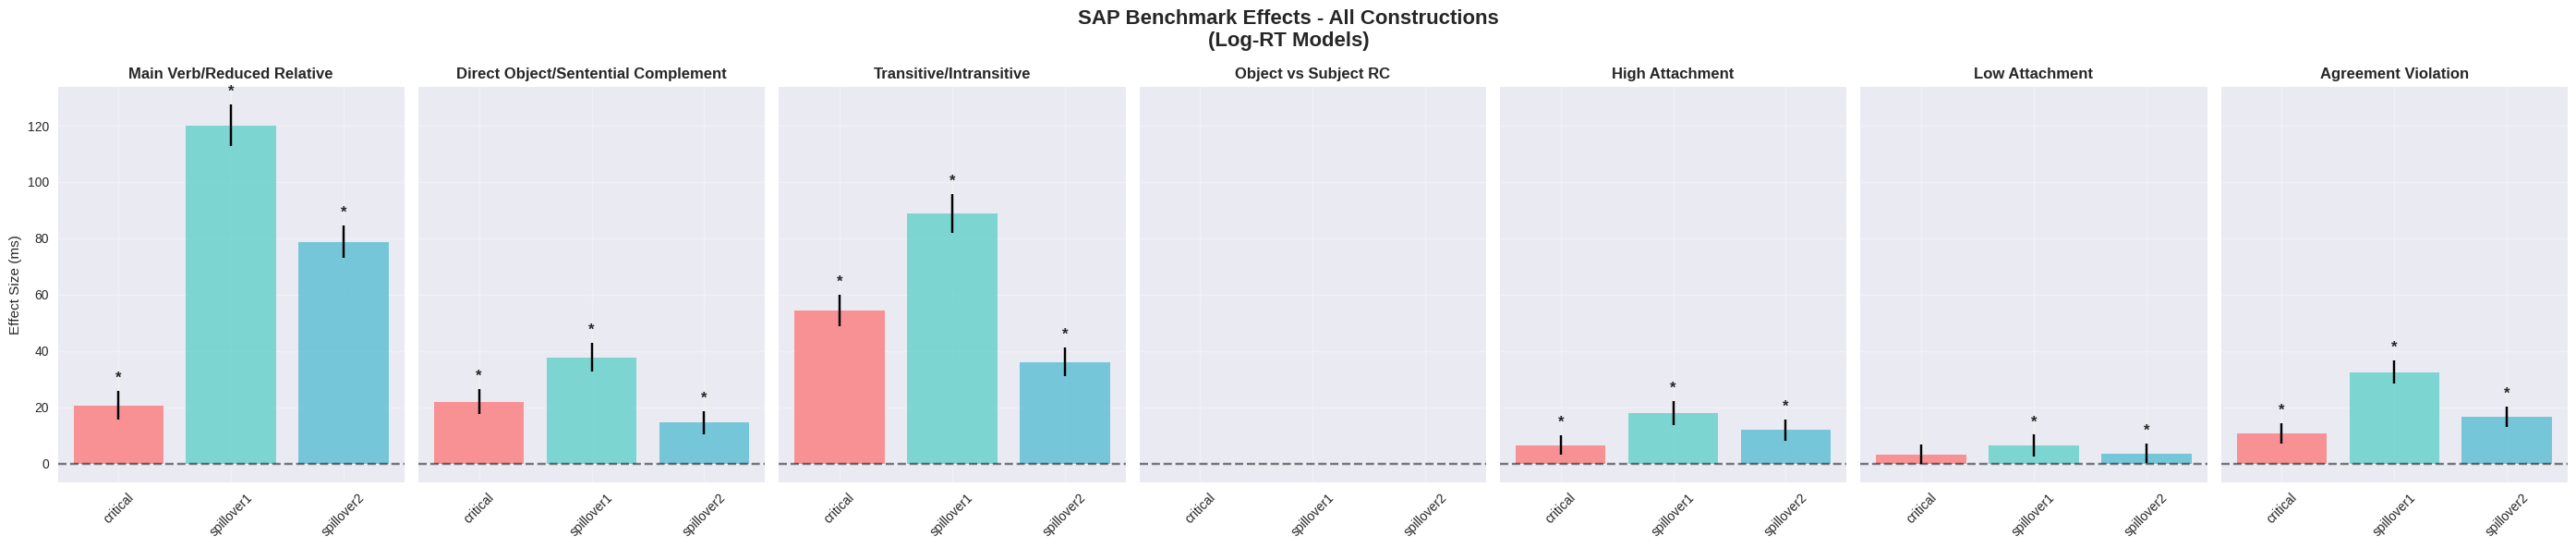

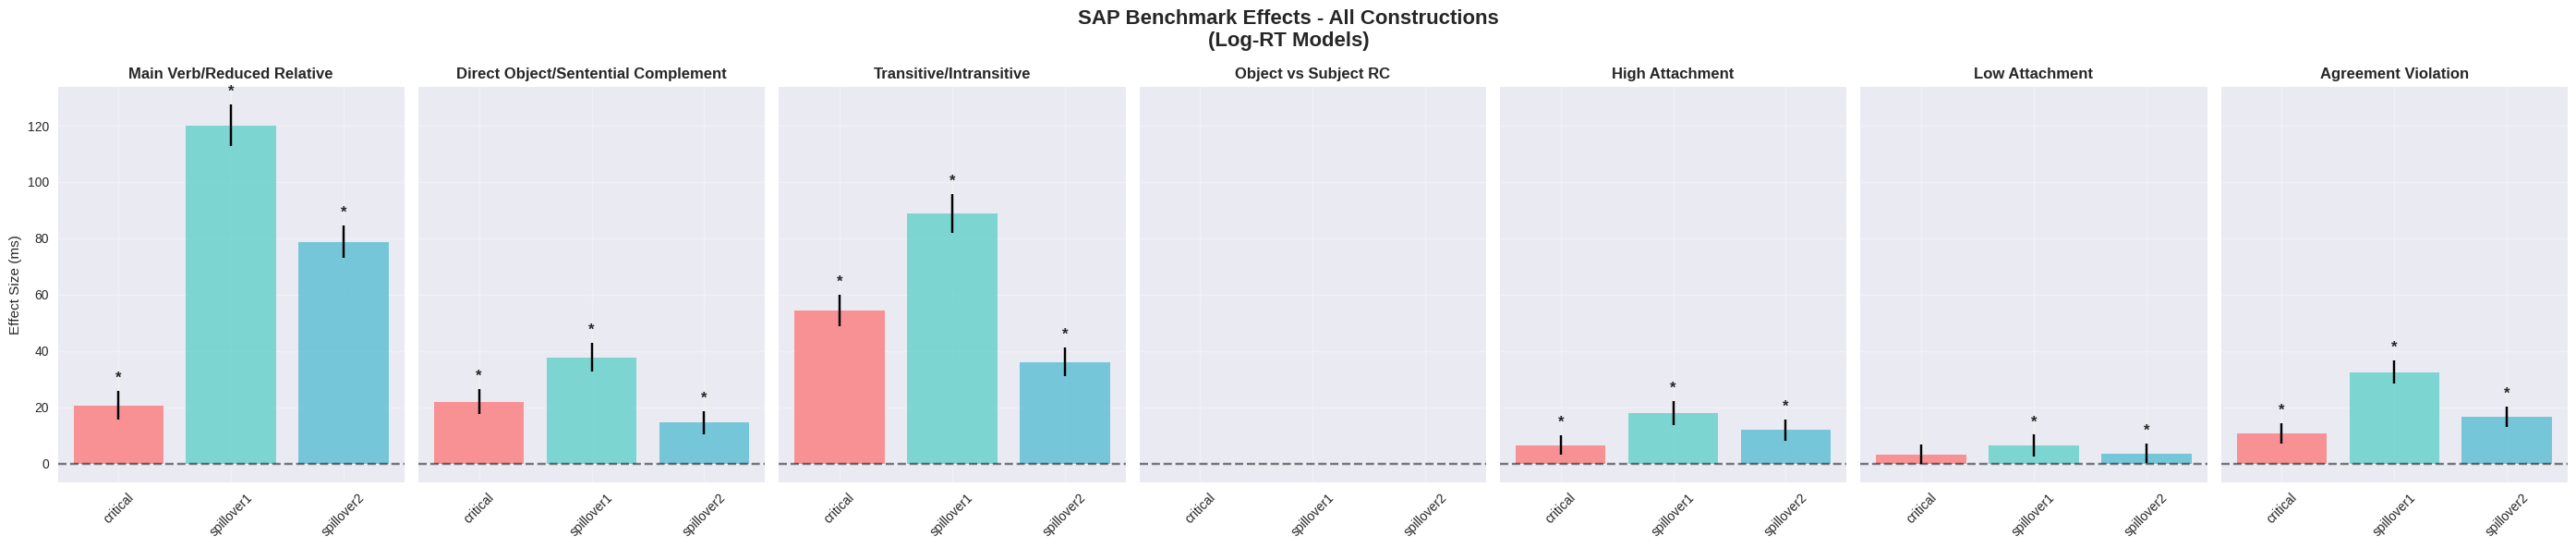

In [8]:
create_comprehensive_plot(results)

In [1]:
from extract_eoi_from_rt import prepare_full_dataset, prepare_construction_subsets



In [4]:
data = prepare_full_dataset(df)
    
    # 2. Create construction subsets
subsets = prepare_construction_subsets(data)

=== FULL DATASET PREPROCESSING ===
Following SAP Benchmark methodology...
Original data shape: (3140162, 24)
Constructions: ['Attachment', 'FILLER1', 'FILLER2', 'MVRR', 'NP/Z Agreement', 'NPS', 'NPZ', 'RelativeClause']
Types: ['AGREE', 'AGREE_UNG', 'AttachHigh', 'AttachLow', 'AttachMulti', 'FILLER1', 'FILLER2', 'MVRR_AMB', 'MVRR_UAMB', 'NPS_AMB', 'NPS_UAMB', 'NPZ_AMB', 'NPZ_UAMB', 'RC_Obj', 'RC_Subj']

RT filtering...
RT range before: -44668-2237665ms
⚠️  Found 4 negative RTs - removing
After RT filtering: (3097812, 24)
RT range after: 100-7000ms

Critical regions data:
  Total observations: 331,532
  Participants: 2187
  Items: 72
  Constructions: ['Attachment', 'MVRR', 'NP/Z Agreement', 'NPS', 'NPZ', 'RelativeClause']

=== PREPARING CONSTRUCTION SUBSETS ===
MVRR Garden Path: 51,549 observations
NPZ Garden Path: 51,657 observations
NPS Garden Path: 51,602 observations
Agreement: 48,031 observations
RELATIVE CLAUSE
Empty DataFrame
Columns: [Time, MD5, Type, WordPosition, EachWord, Even

In [6]:
data['Type'].unique()

array(['AttachMulti', 'AttachLow', 'NPZ_AMB', 'RC_Subj', 'MVRR_UAMB',
       'NPZ_UAMB', 'MVRR_AMB', 'RC_Obj', 'NPS_AMB', 'NPS_UAMB',
       'AttachHigh', 'AGREE_UNG', 'AGREE'], dtype=object)